# Estadistica en AI

La estadistica es la mejor forma de describir las carasteristicas de un conjunto de datos. Por esta razon, la parte exploratoria en el proceso de creacion de un algoritmo inteligente involucra el uso de metodos estadisticos.

## Conceptos utiles sobre estadistica 

### Variables

Una variable estadistica es una *caracteristica* de un conjunto de datos. Por ejemplo, en un ser de datos que almacena informacion sobre transacciones bancarias, el `monto` y la `fecha` son variables. En algunos casos, las variables se conocen como *dimensiones*. En inteligencia artificial, les llamaremos comunmente **features**.

#### Tipos de Variables

- Discretas: unicamente pueden tomar datos de un conjunto finito de opciones. Tambien suelen ser conocidas como categoricas.
- Continuas: pueden tomar cualquier valor en una recta numerica que tiende al infinito. Deben ser cuantificables.


In [1]:
# Datos categoricos
nombres  = ['Hector', 'Issac', 'Roger', 'Marco', 'Jorge', 'Jona'] 
posicion = [1, 2, 3, 4, 5, 6]

#Datos continuos
altura = [1.8, 1.74, 1.7, 1.75, 1.82, 1.81]

# Crear un diccionario de listas para almacenar datos categoricos y continuos
estructura = {
    'nombres': nombres,
    'posicion': posicion,
    'altura': altura
}
print(estructura)

{'nombres': ['Hector', 'Issac', 'Roger', 'Marco', 'Jorge', 'Jona'], 'posicion': [1, 2, 3, 4, 5, 6], 'altura': [1.8, 1.74, 1.7, 1.75, 1.82, 1.81]}


In [11]:
# Reto extra:
# Utilizando la variable "estructura", imprimir el nombre, posicion y altura del cuarto registro
# Debe mostrar algo similar a 'Marco', 4, 1.75

print(estructura['nombres'][3])
print(estructura['posicion'][3])
print(estructura['altura'][3])

Marco
4
1.75


# Pandas

[Pandas](https://pandas.pydata.org/) es una librería de alto rendimiento para manipulación de estructuras de datos. Actualmente, es una de las librerías más populares en ciencia de datos, inteligencia artificial, análisis económico, entre otros.

In [8]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Creación de gráficos y visualizaciones
import matplotlib.pyplot as plt

En pandas, los sets de datos se representan en estructuras llamadas `DataFrame` (usualmente abreviado `df`).

Un `df` puede ser creado de diferentes maneras, en esta sección utilizaremos la `estructura` que ya teníamos para hacer pruebas.

In [9]:
# Crear un set de datos (df)
umg_df = pd.DataFrame(estructura)

# Mostrar el df en consola
umg_df

,nombres,posicion,altura
0,Hector,1,1.80
1,Issac,2,1.74
2,Roger,3,1.70
3,Marco,4,1.75
4,Jorge,5,1.82
5,Jona,6,1.81


 En pandas las columnas se denominan **Series**. Para obtener los datos de una serie, se accede a ella como si fuera un diccionario, es decir `df['llave']`.

In [10]:
# Obtener los datos de una serie, se accede como si fuera un diccionario 
umg_df['nombres']

0    Hector
1     Issac
2     Roger
3     Marco
4     Jorge
5      Jona
Name: nombres, dtype: object

Cada registro en un df se identifica utilizando un indice(`Index`),que usualmente es generado de forma automatica al crear el df. Se accede a el utilizando la propiedad `loc`.

In [12]:
umg_df.loc[3]

nombres     Marco
posicion        4
altura       1.75
Name: 3, dtype: object

Es posible establecer un indice personalizado utilizando una serie del df

In [14]:
# umg_df.drop(['correlativo], axis=1, inplace=True).reset_index()
umg_df.set_index('posicion')

,nombres,altura
posicion,,
1,Hector,1.80
2,Issac,1.74
3,Roger,1.70
4,Marco,1.75
5,Jorge,1.82
6,Jona,1.81


Muchas funciones ejecutadas por un df no lo modifican de forma inmediata, sino crean un nuevo df con la modificacion realizada.

In [17]:
# Para aplicar los cambios, se debe incluir el parámetro inplace=True
umg_df.set_index('posicion', inplace=True)
umg_df

,nombres,altura
posicion,,
1,Hector,1.80
2,Issac,1.74
3,Roger,1.70
4,Marco,1.75
5,Jorge,1.82
6,Jona,1.81


In [16]:
# Para volver a generar un índice automático
umg_df.reset_index(inplace=True)
umg_df

,posicion,nombres,altura
0,1,Hector,1.80
1,2,Issac,1.74
2,3,Roger,1.70
3,4,Marco,1.75
4,5,Jorge,1.82
5,6,Jona,1.81


In [19]:
umg_df.loc[6]

nombres    Jona
altura     1.81
Name: 6, dtype: object

In [20]:
# Creación de un conjunto de datos aleatorios
prueba_df = pd.DataFrame(
    np.random.randint(0, 120, size=(50, 5)),
    columns=['A', 'B', 'C', 'D', 'E']
)

prueba_df.head()

,A,B,C,D,E
0,87,102,87,27,97
1,84,66,89,83,83
2,12,49,117,33,64
3,45,63,10,32,116
4,99,2,117,39,45


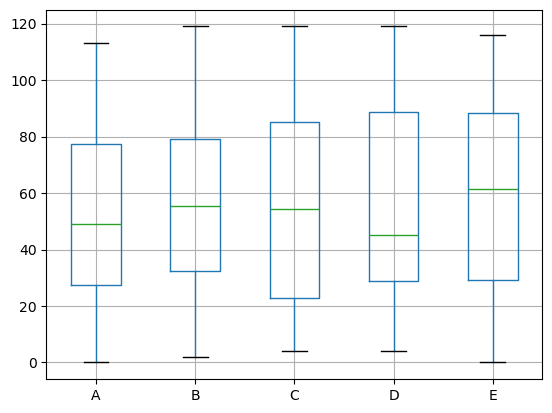

In [21]:
# Distribución
prueba_df.boxplot()
plt.show()

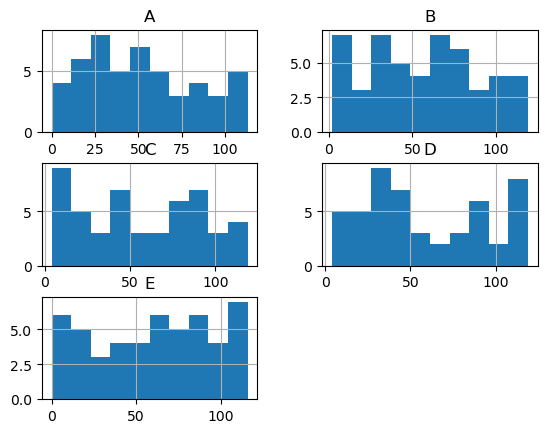

In [22]:
prueba_df.hist()
plt.show()

In [23]:
# Media
prueba_df.mean()

A    52.42
B    56.72
C    56.30
D    58.76
E    59.70
dtype: float64

In [24]:
# Mode
# Esta es la función para contar
prueba_df['B'].mode()

0    10
1    11
2    26
3    34
4    42
5    66
6    71
7    79
8    88
Name: B, dtype: int32

In [25]:
# Desviación estándar
prueba_df.std()

A    31.924714
B    33.517610
C    34.918710
D    36.631959
E    35.487422
dtype: float64

In [26]:
# Correlación
prueba_df.corr()

,A,B,C,D,E
A,1.000000,-0.015718,0.097589,-0.287624,-0.054252
B,-0.015718,1.000000,-0.083502,0.077849,0.066928
C,0.097589,-0.083502,1.000000,-0.244287,-0.068141
D,-0.287624,0.077849,-0.244287,1.000000,0.106869
E,-0.054252,0.066928,-0.068141,0.106869,1.000000
